In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [43]:
circuit = Circuit('Low-Pass RC Filter')

# circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
pulse_line = circuit.PulseVoltageSource('input', 'in', circuit.gnd, initial_value=0, pulsed_value=1@u_V, pulse_width=0.5@u_s, period=5@u_s) # Pulsed supply
R1 = circuit.R(1, 'out', circuit.gnd, 1@u_kΩ)
C1 = circuit.C(1, 'in', 'out', 1@u_uF)

2021-07-20 10:40:44,994 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword


In [44]:
break_frequency = 1 / (2 * math.pi * float(R1.resistance * C1.capacitance))
print("Break frequency = {:.1f} Hz".format(break_frequency))

Break frequency = 159.2 Hz


In [45]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
# analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=1@u_MHz, number_of_points=10,  variation='dec')
analysis = simulator.transient(step_time=pulse_line.period/1000, end_time=pulse_line.period*0.15)
# print(analysis.out)

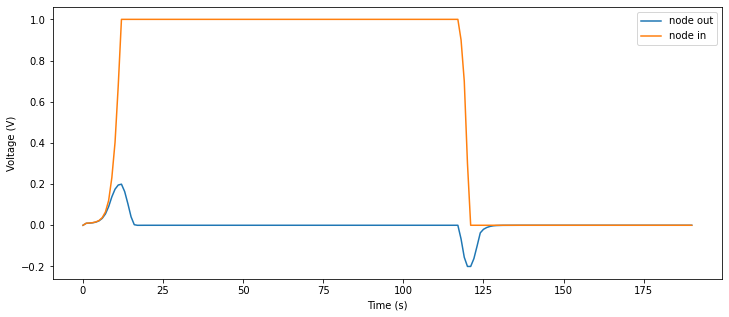

In [46]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
for node, waveform in analysis.nodes.items():
    ax.plot(waveform, label = 'node {}'.format(node))

ax.legend()
ax.set(xlabel='Time (s)', ylabel='Voltage (V)');

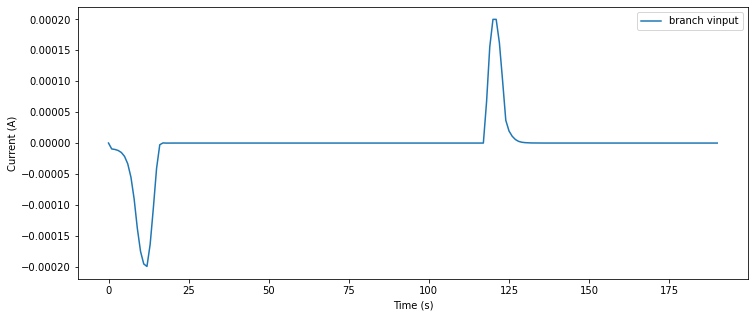

In [47]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
for branch, waveform in analysis.branches.items():
    ax.plot(waveform, label = 'branch {}'.format(branch))
    
ax.legend()
ax.set(xlabel='Time (s)', ylabel='Current (A)');

2021-07-20 10:35:04,229 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2021-07-20 10:35:04,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less


/home/jovyan/.local/lib/python3.9/site-packages/PySpice/Unit/Unit.py:1704: RuntimeWarning: divide by zero encountered in log10
  results = super(UnitValues, self).__array_ufunc__(ufunc, method, *args, **kwargs)
/home/jovyan/.local/lib/python3.9/site-packages/PySpice/Plot/BodeDiagram.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, gain, basex=10, **kwargs)
/home/jovyan/.local/lib/python3.9/site-packages/PySpice/Plot/BodeDiagram.py:46: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axe.semilogx(frequency, phase, basex=10, **kwargs)


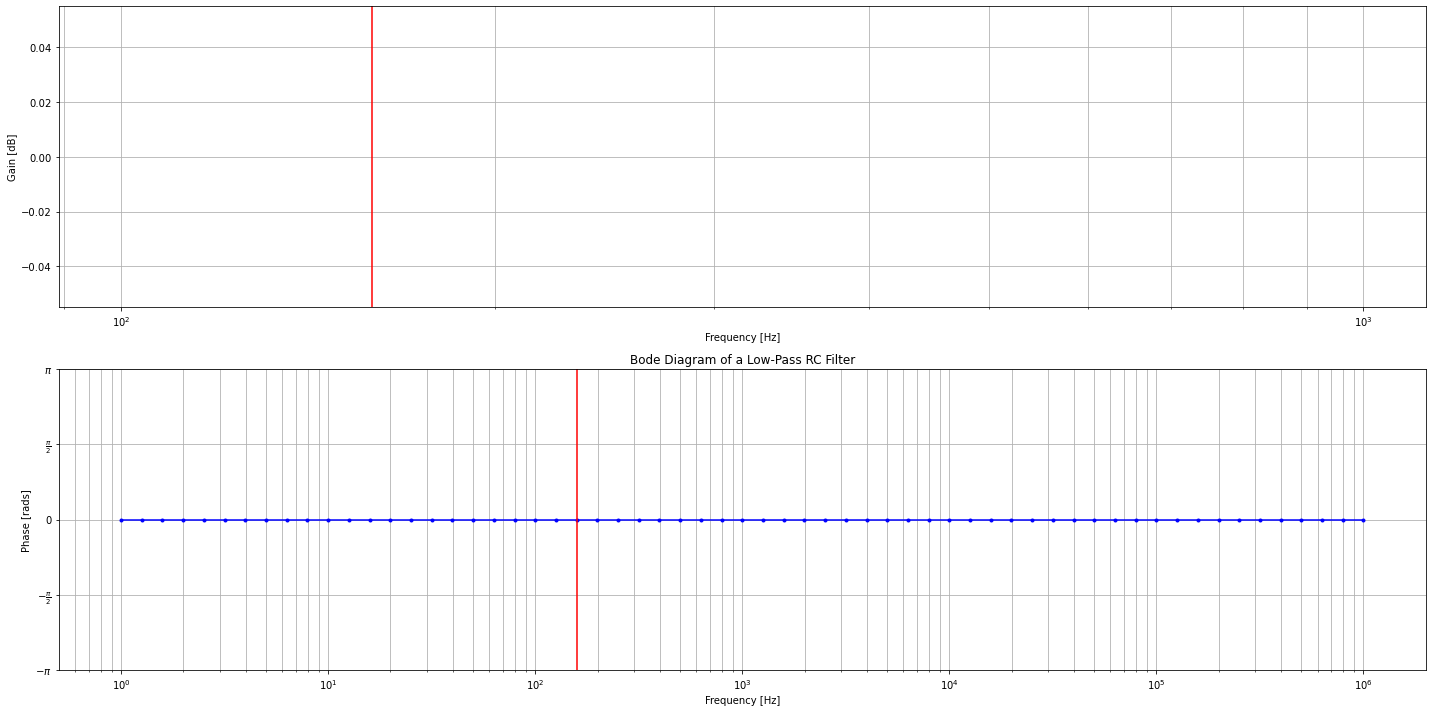

In [9]:
figure, axes = plt.subplots(2, figsize=(20, 10))
plt.title("Bode Diagram of a Low-Pass RC Filter")
bode_diagram(axes=axes,
             frequency=analysis.frequency,
             gain=20*np.log10(np.absolute(analysis.out)),
             phase=np.angle(analysis.out, deg=False),
             marker='.',
             color='blue',
             linestyle='-',
)
for ax in axes:
    ax.axvline(x=break_frequency, color='red')

plt.tight_layout()
plt.show()